# Gaussians product integral

In [2]:
import sympy
from sympy.stats import Normal, density
from sympy import oo
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

## Full-symbolic product of Gaussians

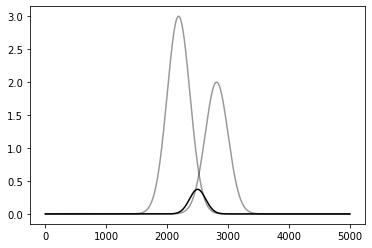

In [27]:
x = sympy.symbols('x', real=True)
a = sympy.symbols(r"\Delta_k", real=True)
b = sympy.symbols(r"\bar\Delta", real=True)
sa = sympy.symbols("\sigma_k", real=True, positive=True)
sb = sympy.symbols(r"\bar\sigma", real=True, positive=True)
amp_a, amp_b = sympy.symbols('A, B', real=True)

A = amp_a * sympy.exp(-(1/2)*((x-a)**2)/(sa**2))
B = amp_b * sympy.exp(-(1/2)*((x-b)**2)/(sb**2))

full_product = A*B
f_full_product = sympy.lambdify((x, amp_a, amp_b, a, b, sa, sb), full_product)

_a, _b, _s, _amp_a, _amp_b = -0.25, 0.25, 0.15, 3., 2.
_x = np.linspace(-2, 2, 5000)
plt.plot(sympy.lambdify((x, amp_a, a, sa), A)(_x, _amp_a, _a, _s), c="k", alpha=0.4)
plt.plot(sympy.lambdify((x, amp_b, b, sb), B)(_x, _amp_b, _b, _s), c="k", alpha=0.4)
plt.plot(f_full_product(_x, _amp_a, _amp_b, _a, _b, _s, _s), c="k")

### Integral

In [28]:
integral_full_product = sympy.simplify(sympy.integrate(A*B, (x, -oo, oo)))
full_symbolic_integral = sympy.lambdify((amp_a, amp_b, a, b, sa, sb), integral_full_product)

In [30]:
sympy.simplify(integral_full_product)

1.4142135623731*sqrt(pi)*A*B*\bar\sigma*\sigma_k*exp((-0.5*\Delta_k**2 + 1.0*\Delta_k*\bar\Delta - 0.5*\bar\Delta**2)/(\bar\sigma**2 + \sigma_k**2))/sqrt(\bar\sigma**2 + \sigma_k**2)

## Semi-symbolic product of Gaussians

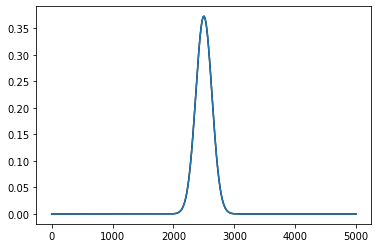

In [86]:
a_s = sympy.sqrt(1/(1/sa**2 + 1/sb**2))
a_m = (a/sa**2 + b/sb**2)*a_s**2
S = 1/sympy.sqrt(2*sympy.pi*sa**2 * sb**2/a_s**2)*sympy.exp(-(a-b)**2/(2*sa**2 * sb**2) * a_s**2)*(2*sympy.pi*sa*sb)

semi_product = amp_a*amp_b*S*density(Normal("A", a_m, a_s))(x)
f_semi_product = sympy.lambdify((x, amp_a, amp_b, a, sa, b, sb), semi_product)

plt.plot(f_full_product(_x, _amp_a, _amp_b, _a, _b, _s, _s), c="k")
plt.plot(f_semi_product(_x, _amp_a, _amp_b, _a, _s, _b, _s))

In [87]:
S

sqrt(2)*sqrt(pi)*exp(-(\Delta_k - \bar\Delta)**2/(2*\bar\sigma**2*\sigma_k**2*(\sigma_k**(-2) + \bar\sigma**(-2))))/sqrt(\sigma_k**(-2) + \bar\sigma**(-2))

The full and semi match at least visually

### Integral

In [88]:
integral_semi_product = sympy.simplify(sympy.integrate(semi_product, (x, -oo, oo)))
semi_symbolic_integral = sympy.lambdify((amp_a, amp_b, a, b, sa, sb), integral_semi_product)

## Numerical product of Gaussians

In [89]:
def gauss(x, a=0, va=1.):
    return np.exp(-0.5*np.square(a-x)/va)

def numerical_product(x, A, B, a, b, va, vb):
    return A*B*gauss(x, a, va)*gauss(x, b, vb)

def numerical_integral(A, B, a, b, sa, sb):
    va = sa**2
    vb = sb**2
    def f(x):
        return numerical_product(x, A, B, a, b, va, vb)
    
    return quad(f, -np.inf, np.inf)

## Analytical product of Gaussians (paper demo)

In [90]:
def analytical_integral(A, B, a, b, sa, sb):
    va = sa**2
    vb = sb**2
    return np.exp(0.5*np.log(2*np.pi) - 0.5 * np.log(va + vb) + 0.5*np.log(va) + 0.5*np.log(vb) - 0.5*(((a-b)**2)/(va+vb)) + np.log(A) + np.log(B))

In [91]:
0.5*np.log(2*np.pi)

0.9189385332046727

## Tests

In [92]:
params = (0.3, 3., 4, 1, 1, 0.5)

numerical, error = numerical_integral(*params)

for f, n in zip([analytical_integral, semi_symbolic_integral, full_symbolic_integral], ["Analytical", "Semi-symbolic", "Full-symbolic"]):
    v = f(*params)
    print(n, "\t", v, np.abs(v-numerical)<error)

Analytical 	 0.027566860376946542 True
Semi-symbolic 	 0.02756686037694655 True
Full-symbolic 	 0.02756686037694665 True
